# NLP_GoingDeeper | 04. Seq2seq와 Attention
---
- 언어모델(Language Model)이란 주어진 단어들을 보고 다음 단어를 맞추는 모델로, 단어 시퀀스에 대한 확률분포를 가리킵니다.
- 단어의 시퀀스를 보고 다음 단어에 $w_1,...,w_{n-1}$가 주어졌을 때, n번째 단어 $w_n$으로 무엇이 올지를 예측하는 확률 모델로 표현됩니다.
- 파라미터 $\theta$로 모델링하는 언어모델을 다음과 같이 표현할 수 있습니다.
$$P(w_n|w_1,...,w_{n-1};\theta)$$
- 이처럼 시퀀스 형태의 Next Token Prediction 언어모델이 아니더라도, 주변 단어를 보고 중심 단어를 예측하는 형태로 언어모델을 구성할 수도 있습니다.

## 통계적 언어 모델(Statistical Language Model)
- 딥러닝이 등장하기 이전에는 통계적 언어 모델(Statistical Language Model)의 사용이 지배적이었습니다.
- 대표적으로 2000년대 초반까지 구글이나 네이버의 번역기는 모두 통계적 언어 모델을 기반으로 하고 있습니다. 
- 통계적 언어모델은 충분한 데이터가 없다면 범용적인 모델을 구축하기 어렵습니다. 한 번도 본 적 없는 단어/문장에 대해서는 확률을 부여할 수 없기 때문입니다. 따라서 언어 모델이 아우르는 범위를 넓히기 위해 다양한 단어를 포함하는 데이터가 필요합니다. 
- 등장한 적 없는 단어나 문장에 대해 모델링을 할 수 없다는 통계적 언어 모델의 단점은 치명적입니다. '데이터가 아무리 많다고 해도, 세상 모든 단어를 포함할 수는 없기 때문입니다. 

- 참고 : [ratsgo 언어모델](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/09/16/LM/)

## 신경망 언어 모델(Neural Network Language Model)
- 통계적 언어 모델의 단점을 개선한 것이 신경망 언어 모델(Neural Network Language Model, NNLM)입니다. 
- NNLM의 시초는 Feed-Forward신경망 언어 모델인데, 지금의 Embedding 레이어의 아이디어인 모델입니다. 

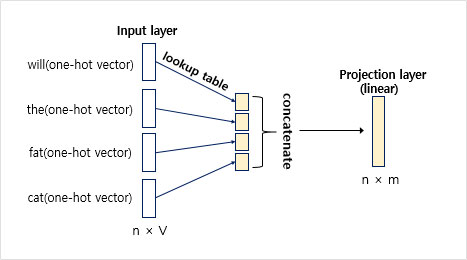

- 희소 문제란 모델이 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링 할 수 없는 문제입니다. 한 번도 관측하지 못한 데이터에 대해선 0에 확률을 부여한다는 것에서 문제가 발생합니다.
- 룩업테이블(lookup table)은 원-핫 입력이 투사층을 거쳐가는 것은 해당 행을 읽어오는 것과 동일하다는 데에서 붙여진 이름입니다. 
- 출력층에서 사용되는 활성함수 softmax의 0-1 사이의 값은 해당 인덱스에 대한 확률을 의미합니다. 
- 각 단어를 일련의 Embedding 벡터로 표현한 후, 이전의 정해진 개수의 몇 개 단어를 활용해 다음 단어를 예측하는 것에는 한계가 있습니다.
- 다시 말하면 여러 개의 단어(Embedding)을 합쳐(Concatenate) 고정된 크기의 Weight를 Linear로 처리하는 방식은 유연성에 한계가 있는 것입니다. 
- 이에 따라 고안된 것이 순환신경망(recurrent neural network)를 활용한 언어 모델입니다. 


- 참고 : [피드 포워드 신경망 언어모델](https://wikidocs.net/45609)

## Sequence to Sequence 문제

- RNN은 고정된 크기의 Weight가 선언되는 것은 동일하지만, 입력을 순차적으로 '적립'(누적, 기억)하는 방식을 채택함으로써 유동적인 크기의 입력을 처리할 수 있었습니다.
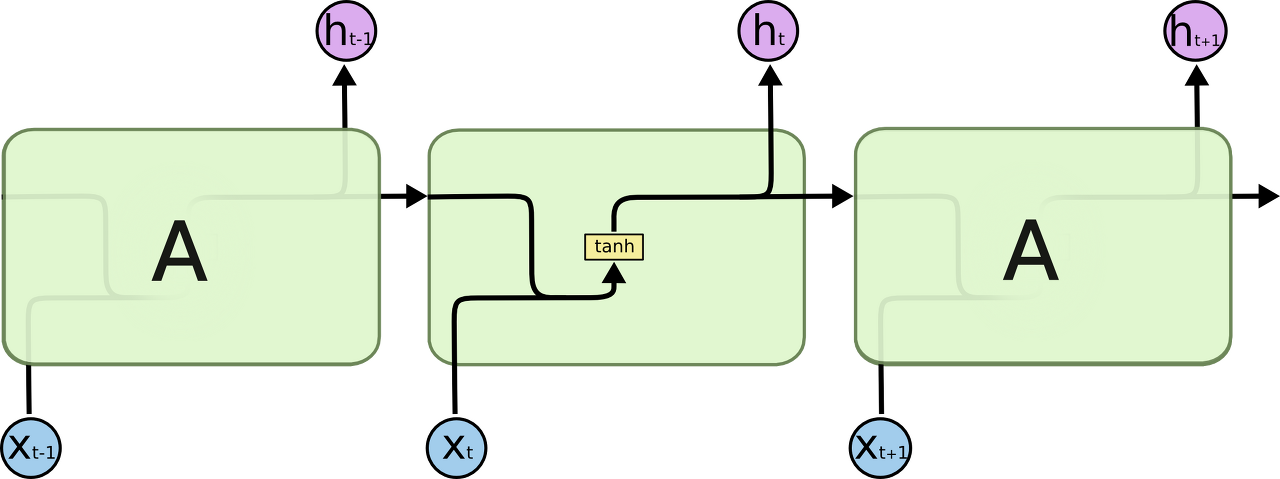
- 그러나 하나의 Weight에 입력을 적립하다보니, 입력이 길어질수록 이전 입력에 대한 정보가 소실되는 기울기소실(Vanishing Gradient)문제가 있습니다. 
    - 이 문제는 [LSTM](https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr)을 고안하여 개선되었습니다. 
    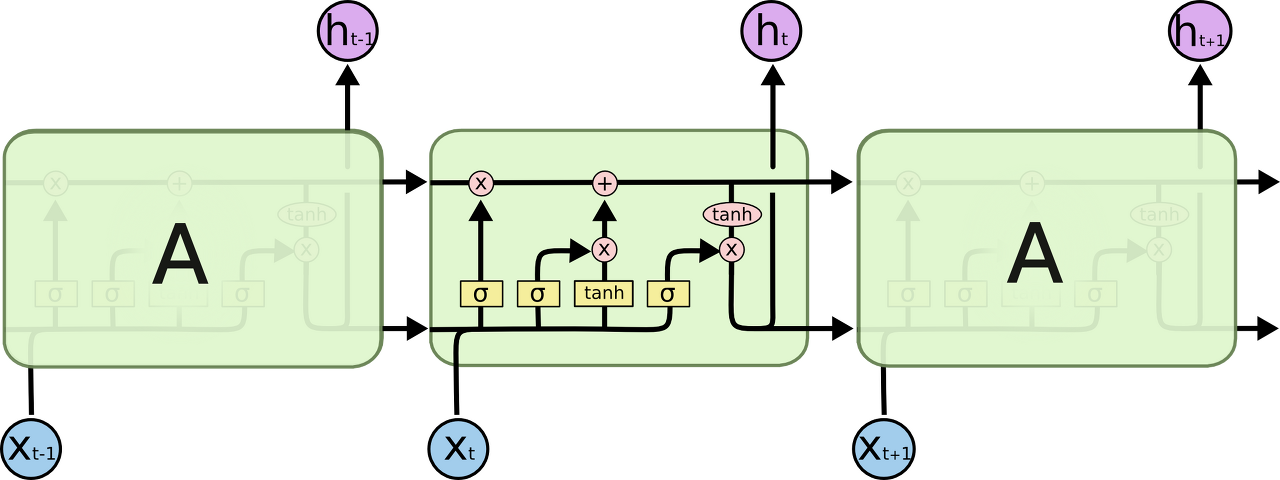

- 또한 단어 단위로 입력과 출력을 순환하는 RNN 구조는 문장 생성엔 적합하지만, 번역에 사용하기는 어렵다는 문제가 있습니다. 번역에는 문장 전체를 보고나서 생성하는 구조가 필요했습니다.

- 이에 2014년 구글은 Sequence to Senquence(Seq2Seq)구조를 제안합니다.
- 참고 : [Seq2Seq 논문](https://proceedings.neurips.cc/paper/2014/file/a14ac55a4f27472c5d894ec1c3c743d2-Paper.pdf), [논문리뷰](https://reniew.github.io/35/)
- seq2seq의 저자들은 단순한 RNN은 긴 입력에 대한 정보를 학습시키기 어렵게 때문에 LSTM을 사용했습니다. 
- A simple strategy for general sequence learning is to map the input sequence to a fixed-sized vector using one RNN, and then to map the vector to the target sequence with another RNN (this approach has also been taken by Cho et al. 5). While it could work in principle since the RNN is provided with all the relevant information, it would be difficult to train the RNNs due to the resulting long term dependencies 14, 4 (figure 1) 16, 15. However, the Long Short-Term Memory (LSTM) 16 is known to learn problems with long range temporal dependencies, so an LSTM may succeed in this setting.
$$p(y_1, ..., y_{T'} | x_1, ... , x_T) = Π_{t=1}^{T'} p(y_t|v, y_1, ..., y_{t-1})$$
- x: Input Sequence
- y: Output Sequence
- v: 인코더의 입력 x에 대한 고정된 크기의 Representation Vector 아웃풋으로서, 디코더의 입력으로 사용됨. 
    - The LSTM computes this conditional probability by first obtaining the fixed-dimensional representation v of the input sequence (x1, . . . , xT ) given by the last hidden state of the LSTM...
- 입력과 출력의 "establish communication"에서, 입력 abc와 출력 def에 대해 a->d, b->e, c->f의 관계를 가진다면 입력을 cba로 뒤집어 갖은 거리를 갖게 하는데, 이러한 단순한 변형은 SGD가 입출력 간의 구조적 관계를 파악하는 것을 용이하게 하고, LSTM에 대한 성능을 Boost 하는 효과가 있습니다. 
- 참고 : [시퀀스 투 시퀀스](https://wikidocs.net/24996)
-  Encoder은 입력 문장의 모든 단어들을 순차적으로 입력받고 모든 단어를 압축한 단 하나의 컨텍스트 벡터(Context vector)를 만듭니다.
- 문장의 시작과 끝에 붙는 특수한 토큰들이 있습니다. 
    - 시작토큰이 없는 경우, Decoder의 첫 입력으로 전달할 단어가 없어져 번역을 진행할 수 없습니다. 만일 랜덤한 단어를 입력으로 넣는 경우, 번역의 성능에 문제가 생깁니다.
    - 끝 토큰이 없는 경우, 문장의 끝을 알릴 수 없어 단어를 무한정 생성하게 됩니다. 온점이나 느낌표 등을 끝 토큰으로 사용하기엔 불안정한 성능을 보일 것입니다. 
- 문맥을 더 잘 반영하는 벡터를 생성하는 메커니즘이 바로 어텐션 메커니즘(Attention)입니다. 


## Seq2Seq 구현
- 데이터를 직접 다루기보다는 차원 수를 확인하는 실습을 진행합니다. 


## LSTM Encoder
- Embedding 레이어를 단어 사이즈와 Embedding 차원에 대해 선언을 한 후, 논문에서 소개한 대로 tf.keras.layers.LSTM(enc_units)으로 LSTM을 정의합니다. 
- TensorFlow 속 LSTM 모듈의 기본 반환 값은 최종 State 값이므로 return_sequences 나 return_state 값은 따로 조정하지 않습니다 (기본: False)
- 우리가 정의해 준 Encoder 클래스의 반환 값이 곧 컨텍스트 벡터(Context Vector) 가 됩니다. 

In [3]:
import tensorflow as tf

class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.lstm = tf.keras.layers.LSTM(enc_units) # return_sequences 매개변수를 기본값 False로 전달

    def call(self, x):
        print("입력 Shape:", x.shape)

        x = self.embedding(x)
        print("Embedding Layer를 거친 Shape:", x.shape)

        output = self.lstm(x)
        print("LSTM Layer의 Output Shape:", output.shape)

        return output

In [4]:
vocab_size = 30000
emb_size = 256
lstm_size = 512
batch_size = 1
sample_seq_len = 3

print("Vocab Size: {0}".format(vocab_size))
print("Embedidng Size: {0}".format(emb_size))
print("LSTM Size: {0}".format(lstm_size))
print("Batch Size: {0}".format(batch_size))
print("Sample Sequence Length: {0}\n".format(sample_seq_len))

Vocab Size: 30000
Embedidng Size: 256
LSTM Size: 512
Batch Size: 1
Sample Sequence Length: 3



In [10]:
encoder = Encoder(vocab_size, emb_size, lstm_size)
sample_input = tf.zeros((batch_size, sample_seq_len))

sample_output = encoder(sample_input) #- # 컨텍스트 벡터로 사용할 인코더 LSTM의 최종 State값

입력 Shape: (1, 3)
Embedding Layer를 거친 Shape: (1, 3, 256)
LSTM Layer의 Output Shape: (1, 512)


## LSTM Decoder
- Decoder는 Encoder와 구조적으로 유사하지만 결과물을 생성해야 하므로 Fully Connected 레이어가 추가되었고, 출력값을 확률로 변환해주는 Softmax 함수도 추가되었습니다. (softmax함수는 모델 내부에 포함하지 않고 훈련 과정에서 포함시키는 방법도 있습니다)
- Decoder가 매 스템 생성하는 출력은 우리가 원하는 번역 결과에 해당하므로 LSTM 레이어의 rerturn_sequences 변수를 True로 설정하여 State 값이 아닌 Sequence값을 출력으로 받습니다. 

In [12]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.lstm = tf.keras.layers.LSTM(dec_units,
                                     return_sequences=True) # return_sequences 매개변수를 True로 설정
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.softmax = tf.keras.layers.Softmax(axis=-1)
    
    def call(self, x, context_v): #- 디코더의 입력 x 와 인코더의 컨텍스트 벡터를 인자로 받습니다
        print("입력 Shape:", x.shape)
        
        x = self.embedding(x)
        print("Embedding Layer를 거친 Shape:", x.shape)
        
        context_v = tf.repeat(tf.expand_dims(context_v, axis=1),
                             repeats = x.shape[1], axis=1)
        x = tf.concat([x, context_v], axis=-1) #- 컨텍스트 벡터를 concat 합니다.
        print("Context vector가 더해진 Shape:", x.shape)
        
        x = self.lstm(x)
        print("LSTM Layer의 Output Shape:", x.shape)
        
        output = self.fc(x)
        print("Decoder 최종 Output Shape:", output.shape)
        
        return self.softmax(output)

In [8]:
print("Vocab Size: {0}".format(vocab_size))
print("Embedidng Size: {0}".format(emb_size))
print("LSTM Size: {0}".format(lstm_size))
print("Batch Size: {0}".format(batch_size))
print("Sample Sequence Length: {0}\n".format(sample_seq_len))

Vocab Size: 30000
Embedidng Size: 256
LSTM Size: 512
Batch Size: 1
Sample Sequence Length: 3



In [13]:
decoder = Decoder(vocab_size, emb_size, lstm_size)
sample_input = tf.zeros((batch_size, sample_seq_len))

dec_output = decoder(sample_input, sample_output)  # Decoder.call(x, context_v) 을 호출

입력 Shape: (1, 3)
Embedding Layer를 거친 Shape: (1, 3, 256)
Context vector가 더해진 Shape: (1, 3, 768)
LSTM Layer의 Output Shape: (1, 3, 512)
Decoder 최종 Output Shape: (1, 3, 30000)


## Bahdanau Attention
- 2013년 sequence to sequence의 문맥 벡터(context vector)를 개선하기 위해서 attention mechanism이 제안되었습니다. 
- 이는 모델이 필요한 정보를 선택하여 이용할 수 있는 능력을 주었고, 자연어처리 이외에도 다양한 문제에서 성능을 향상했습니다. 더불어 모델의 작동방식을 시각적으로 확인할 수 있도록 도와줍니다. 
- 그런데 Bahdanau는 Seq2Seq의 컨텍스트 벡터가 고정된 길이로 정보를 압축하는 것이 손실을 야기한다고 주장했습니다. 
- 즉 짧은 문장에 대해서는 괜찮다고 해도, 문장이 길어질수록 성능이 저하된다는 것입니다. 
- 때문에 Encoder의 최종 state 값만을 사용하는 기존의 값이 아니라, 매 스텝의 Hidden State를 활용해 컨텍스트 벡터를 구축하는 Attention 메커니즘을 제안합니다. 
- A potential issue with this encoder-decoder approach is that a neural network needs to be able to compress all the necessary information of a source sentenc into a fixed-length vector
- Instead, it **encodes the input sentence into a sequence of vectors and chooses a subset of these vectors adaptively while decoding the translation**. This frees a neural translation model from having to squash all the information of a source sentence, regardless of its length, into a fixed- length vector. 

- [NEURAL MACHINE TRANSLATION BY JOINTLY LEARNING TO ALIGN AND TRANSLATE](https://arxiv.org/pdf/1409.0473.pdf)
- [Attention mechanism in NLP. From seq2seq + attention to BERT](https://lovit.github.io/machine%20learning/2019/03/17/attention_in_nlp/)

## attn-seq2seq
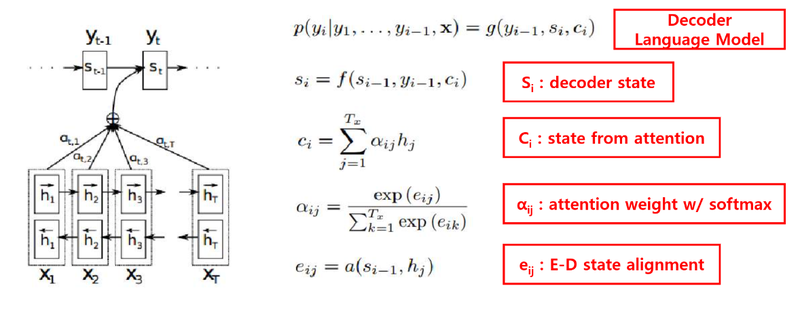
- i는 디코더의 인덱스, j 는 인코더의 인덱스입니다.
- seq2seq의 인코더가 해석한 context는 디코더의 포지션 i 에 무관하게 일정했으나, attention이 가미되면, 디코더가 현재 시점 i에서 보기에 인코더의 어느부분 j 가 중요한지 고려하게 됩니다. 이 가중치가 attention입니다. 위 식에서 a_{ij}가 인코더의 j 번째 hidden state h_j가 얼마나 강조되어야 할지를 강조하는 가중치 역할을 합니다. 
- 가중치의 합이 1이되는 것은 입력값을 확률값으로 변환해주는 softmax 함수의 영향입니다. 
- 참고 : [Attn: Illustrated Attention](https://eda-ai-lab.tistory.com/157)
- Bahdanau attention에서 실제 평가 함수는 아래와 같이 특정 벡터 공간으로 매핑된 두 Hidden State의 합으로 정의됩니다. 
- RNN은 단어의 정보를 순차적으로 적립하여 hidden state를 구축하기 때문에 순방향 rnn의 첫 단어는 그 단어의 정보만을 담았다고 해도, 그 이후 스텝들은 거쳐온 모든 단어의 정보를 포함하기 때문에 softmax의 결괏값은 encoder에 매 스텝마다 입력으로 들어온 각 단어와 독립적이지 않습니다.
- Hidden State에 Softmax 값을 곱하여 Alignment 값을 얻었습니다. 해당 값을 모두 더하여 최종적인 컨텍스트 벡터를 얻는데, 이는 컨텍스트 벡터가 핵심 단어(비중이 큰 단어)에 가장 근접하게 다가서되, 주변 단어에도 각각의 비중만큼 영향을 받아 문장을 적합한 위치에 매핑되게 합니다. 
- 기존 RNN의 최종 스텝을 컨텍스트 벡터로 쓰던 방식은 항상 고정된 비중을 사용(마지막에 등장한 단어가 큰 비중)하는 셈이므로 Bahdanau의 방식보다 문맥 정보를 유연하게 반영하지 못합니다.
- bahdanau방식에서 생성된 컨텍스트 벡터는 Decoder의 이전 Hidden State와 Concatenate하여 새로운 Hidden State로 정의됩니다. 



In [20]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W_decoder = tf.keras.layers.Dense(units)
        self.W_encoder = tf.keras.layers.Dense(units)
        self.W_combine = tf.keras.layers.Dense(1)

    def call(self, H_encoder, H_decoder):
        print("[ H_encoder ] Shape:", H_encoder.shape)

        H_encoder = self.W_encoder(H_encoder)
        print("[ W_encoder X H_encoder ] Shape:", H_encoder.shape)

        print("\n[ H_decoder ] Shape:", H_decoder.shape)
        H_decoder = tf.expand_dims(H_decoder, 1)
        H_decoder = self.W_decoder(H_decoder)

        print("[ W_decoder X H_decoder ] Shape:", H_decoder.shape)

        score = self.W_combine(tf.nn.tanh(H_decoder + H_encoder))
        print("[ Score_alignment ] Shape:", score.shape)

        attention_weights = tf.nn.softmax(score, axis=1)
        print("\n최종 Weight:\n", attention_weights.numpy())

        context_vector = attention_weights * H_decoder
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights


In [21]:
W_size = 100

print("Hidden State를 {0}차원으로 Mapping\n".format(W_size))

attention = BahdanauAttention(W_size)

enc_state = tf.random.uniform((1, 10, 512))
dec_state = tf.random.uniform((1, 512))

_ = attention(enc_state, dec_state)

Hidden State를 100차원으로 Mapping

[ H_encoder ] Shape: (1, 10, 512)
[ W_encoder X H_encoder ] Shape: (1, 10, 100)

[ H_decoder ] Shape: (1, 512)
[ W_decoder X H_decoder ] Shape: (1, 1, 100)
[ Score_alignment ] Shape: (1, 10, 1)

최종 Weight:
 [[[0.1258521 ]
  [0.10416304]
  [0.07127965]
  [0.10436051]
  [0.07675558]
  [0.13894576]
  [0.10556686]
  [0.12758662]
  [0.0977663 ]
  [0.04772358]]]


- Encoder의 모든 스텝에 대한 Hidden State를 100차원의 벡터 공간으로 매핑 (1, 10, 100) 하고, Decoder의 현재 스텝에 대한 Hidden State 역시 100차원의 벡터 공간으로 매핑 (1, 1, 100)해 두 State의 합으로 정의된 Score (1, 10, 1) 를 구하는 모습입니다.
-  Softmax를 거쳐 나온 값은 0-1 사이의 값으로 각 단어가 차지하는 비중을 의미합니다. 
- 위에서는 랜덤한 값을 사용했기 때문에 비중이 비슷비슷하지만 실제 단어로 적용시켜보면 유사한 단어에 높은 비중을 할당하게 됩니다. 

## Luong Attention
- Luong의 Attention은 Bahdanau의 방식을 약간 발전시킨 형태입니다.
- Decoder의 현재 Hidden State를 구하기 위해 한 스텝 이전의 Hidden State를 활용하는 것은 연산적으로 비효율적입니다.
- 참고 : [[Attention] Luong Attention 개념 정리](https://hcnoh.github.io/2019-01-01-luong-attention), [논문](https://arxiv.org/pdf/1508.04025.pdf)
- 4가지 score 함수 Dot, General, Concat, Location 중 가장 합리적인 성능을 보이는 함수는 General입니다. 
- Bahdanau의 Score 함수와는 다르게 하나의 Weight만을 사용하는 것이 특징입니다.
- 어떤 벡터 공간에 매핑해주는 과정이 없기 때문에 Weight의 크기는 단어 Embedding 크기와 동일해야 연산이 가능합니다. 

In [22]:
class LuongAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(LuongAttention, self).__init__()
        self.W_combine = tf.keras.layers.Dense(units)

    def call(self, H_encoder, H_decoder):
        print("[ H_encoder ] Shape:", H_encoder.shape)

        WH = self.W_combine(H_encoder)
        print("[ W_encoder X H_encoder ] Shape:", WH.shape)

        H_decoder = tf.expand_dims(H_decoder, 1)
        alignment = tf.matmul(WH, tf.transpose(H_decoder, [0, 2, 1]))
        print("[ Score_alignment ] Shape:", alignment.shape)

        attention_weights = tf.nn.softmax(alignment, axis=1)
        print("\n최종 Weight:\n", attention_weights.numpy())

        attention_weights = tf.squeeze(attention_weights, axis=-1)
        context_vector = tf.matmul(attention_weights, H_encoder)

        return context_vector, attention_weights

In [23]:
emb_dim = 512

attention = LuongAttention(emb_dim)

enc_state = tf.random.uniform((1, 10, emb_dim))
dec_state = tf.random.uniform((1, emb_dim))

_ = attention(enc_state, dec_state)

[ H_encoder ] Shape: (1, 10, 512)
[ W_encoder X H_encoder ] Shape: (1, 10, 512)
[ Score_alignment ] Shape: (1, 10, 1)

최종 Weight:
 [[[2.8563984e-04]
  [2.9570449e-04]
  [8.8135570e-01]
  [2.7953614e-02]
  [3.6967432e-04]
  [5.5667199e-03]
  [1.7538083e-04]
  [8.9227893e-07]
  [9.6498560e-03]
  [7.4346855e-02]]]


## 미래의 기법들
- 참고 : [Google's Neural Machine Translation System.
](https://norman3.github.io/papers/docs/google_neural_machine_translation.html)
- GNMT는 Attention을 활용한 Seq2seq 모델으로, Bahdanau Attention 방식을 채택합니다. 
- Residual Connection 을 사용했을 때, 정확도 및 학습 속도가 향상되며, Gradience Exploding/ Vanishing 문제를 해결합니다. 
- GNMT에서 언급되는 Copy Model이란 한 번도 본 적 없는 단어에 대해서 \<UNK\> 토큰 처리를 하지 않고 단어를 그대로 복사하여 적당한 위치에 배치하는 모델입니다. 
- GNMT의 레이어를 쌓는 구조나 Residual Connection은 이후 등장한 NLP의 꽃, 트랜스포머(Transformer)와 유사합니다. 
- 트랜스포머 모델은 Multi-Head Attention이라는 개념을 도입해 폭넓은 문맥을 파악하게 하고, 기존의 RNN구조를 완전히 탈피하여 연산 속도 측면에서도 혁신적 발전을 일으켰습니다. 